In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [4]:
csv_path = "../../results/sslvr-action_classification_221121.csv"

In [19]:
df = pd.read_csv(csv_path, index_col=0)
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.replace(u'\u200b', ''))
    df[col] = df[col].astype(float)

In [49]:
# df_flat = pd.DataFrame(None, columns=["Method", "Dataset", "Top-1"])
df_flat = []

for col in df.columns:
    for idx in df.index:
        row = {
            "Method": idx,
            "Dataset": col,
            "Top-1": df.loc[idx, col],
        }

        df_flat.append(row)

df_flat = pd.DataFrame(df_flat)

In [20]:
index = df.index
index = [x.replace(u'\u200b', '').strip() for x in index]
df.index = index

In [21]:
df

,UCF101,Something-something,FineGym,NTU
None,75.36,56.81,86.98,92.87
RSPNET,85.59,53.75,86.13,93.51
Video Moco,85.83,58.75,87.63,94.09
Pretext-Contrast,86.60,54.03,88.43,93.86
SELAVI,84.88,56.37,84.75,92.78
TCLR,90.77,59.64,87.97,94.11
CTP,89.77,60.16,89.98,94.31
GDT,91.14,57.78,87.12,93.89
Full-supervision,94.08,61.02,88.11,93.89


In [22]:
df.index

Index(['None', 'RSPNET', 'Video Moco', 'Pretext-Contrast', 'SELAVI', 'TCLR',
       'CTP', 'GDT', 'Full-supervision'],
      dtype='object')

In [23]:
# reorder columns
# df = df.reindex(df.mean().sort_values().index, axis=1)

In [24]:
df

,UCF101,Something-something,FineGym,NTU
None,75.36,56.81,86.98,92.87
RSPNET,85.59,53.75,86.13,93.51
Video Moco,85.83,58.75,87.63,94.09
Pretext-Contrast,86.60,54.03,88.43,93.86
SELAVI,84.88,56.37,84.75,92.78
TCLR,90.77,59.64,87.97,94.11
CTP,89.77,60.16,89.98,94.31
GDT,91.14,57.78,87.12,93.89
Full-supervision,94.08,61.02,88.11,93.89


### Normalizing ([Reference](https://arxiv.org/pdf/2103.13318.pdf))

In [25]:
norm_df = df.copy()
for col in df.columns:
    norm_df[col] = ((norm_df[col] / df.loc["None", col]) - 1) * 100

In [26]:
norm_df

,UCF101,Something-something,FineGym,NTU
None,0.000000,0.000000,0.000000,0.000000
RSPNET,13.574841,-5.386376,-0.977236,0.689135
Video Moco,13.893312,3.414892,0.747298,1.313664
Pretext-Contrast,14.915074,-4.893505,1.667050,1.066006
SELAVI,12.632696,-0.774512,-2.563808,-0.096910
TCLR,20.448514,4.981517,1.138193,1.335200
CTP,19.121550,5.896849,3.449069,1.550555
GDT,20.939490,1.707446,0.160957,1.098309
Full-supervision,24.840764,7.410667,1.299149,1.098309


<AxesSubplot:>

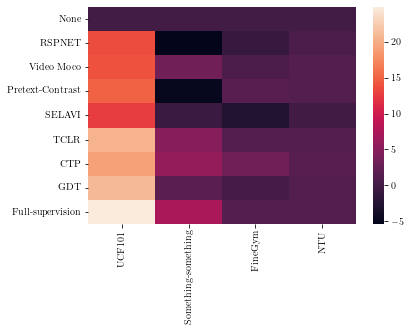

In [27]:
sns.heatmap(norm_df)

### Column-wise normalized

In [28]:
norm_df=(df-df.loc["None"])/(df.loc["Full-supervision"]-df.loc["None"])

In [29]:
norm_df

,UCF101,Something-something,FineGym,NTU
None,0.000000,0.000000,0.000000,0.000000
RSPNET,0.546474,-0.726841,-0.752212,0.627451
Video Moco,0.559295,0.460808,0.575221,1.196078
Pretext-Contrast,0.600427,-0.660333,1.283186,0.970588
SELAVI,0.508547,-0.104513,-1.973451,-0.088235
TCLR,0.823184,0.672209,0.876106,1.215686
CTP,0.769765,0.795724,2.654867,1.411765
GDT,0.842949,0.230404,0.123894,1.000000
Full-supervision,1.000000,1.000000,1.000000,1.000000


In [61]:
norm_df.columns = [["UCF101", "NTU", "Something-something", "FineGym"]]

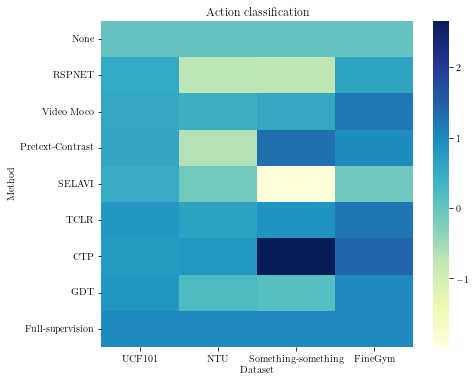

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

sns.heatmap(norm_df, cmap="YlGnBu", ax=ax)

ax.set_title("Action classification")

ax.set_xlabel("Dataset")
ax.set_ylabel("Method")

plt.show()

### Column-wise normalised and UCF sorted

In [62]:
sorted_norm_df = norm_df.sort_values(by=["UCF101"], ascending=[True])

ValueError: The column label 'UCF101' is not unique.
For a multi-index, the label must be a tuple with elements corresponding to each level.

In [41]:
sorted_norm_df = sorted_norm_df[["UCF101", "NTU", "FineGym", "Something-something"]]

<AxesSubplot:>

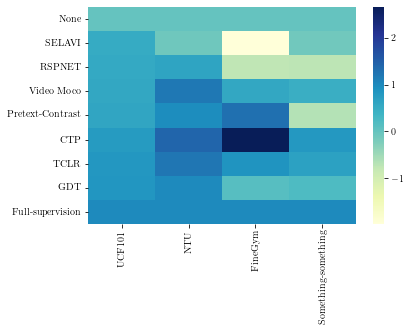

In [43]:
sns.heatmap(sorted_norm_df, cmap="YlGnBu")

### Scatter/line plots

In [31]:
df.var()

UCF101                 29.067150
Something-something     6.683750
FineGym                 2.182703
NTU                     0.295186
dtype: float64

In [32]:
norm_df.var()

UCF101                 0.082945
Something-something    0.377100
FineGym                1.709376
NTU                    0.283724
dtype: float64

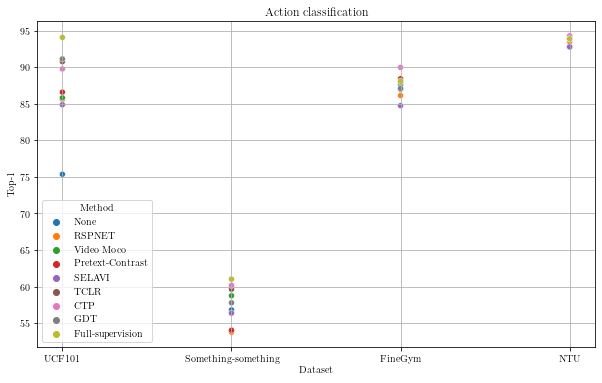

In [59]:
fig, ax =  plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(data=df_flat, x="Dataset", y="Top-1", hue="Method", ax=ax)

ax.set_title("Action classification")
ax.grid()

plt.show()

In [37]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.replace(u'\u200b', '')).astype(float)

AttributeError: 'float' object has no attribute 'replace'

ValueError: s must be a scalar, or float array-like with the same size as x and y

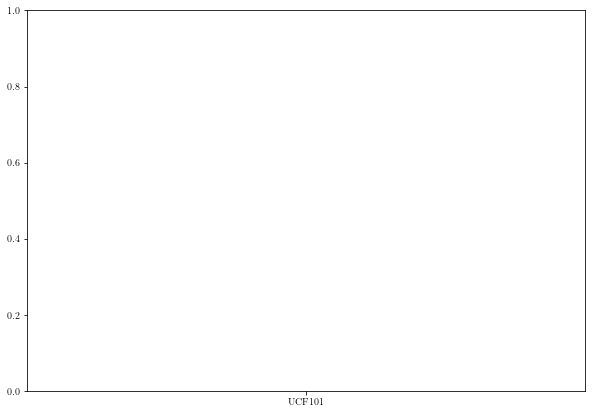

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))


for i, method in enumerate(df.index):
    xvalues = df.columns
    yvalues = df.loc[method].values
    ax.scatter(xvalues, yvalues, "--k")
    # import ipdb; ipdb.set_trace()
#     for j, method in enumerate(df.index):
#         idx = i * len(df.index) + j
#         df_flat.loc[idx] = [dataset, method, df.loc[method, dataset]]



In [39]:
df_flat

NameError: name 'df_flat' is not defined

In [40]:
cols = []
for col in df_flat.columns:
    df_flat[col] = df_flat[col].apply(lambda x: x.replace(u'\u200b', '') if isinstance(x, str) else x)
    cols.append(col.replace(u'\u200b', ''))
df_flat.columns = cols

# indices = []
# for idx in df_flat.index:
#     indices.append(idx.replace(u'\u200b', ''))
# df_flat.index = indices

NameError: name 'df_flat' is not defined

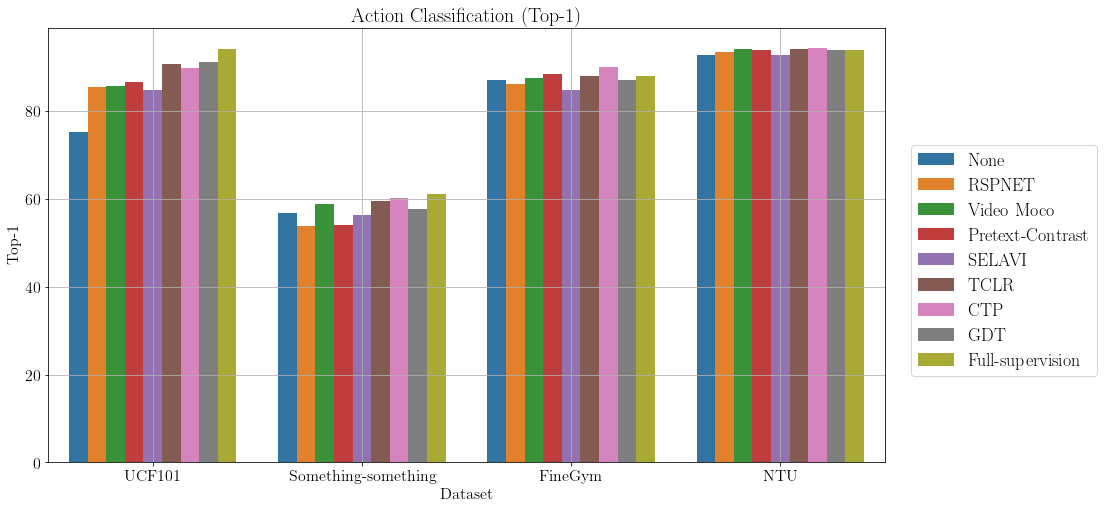

In [156]:
fig, ax =  plt.subplots(1, 1, figsize=(15, 8))
sns.barplot(data=df_flat, x="Dataset", y="Top-1", hue="Pretraining method", ax=ax)
ax.grid()
ax.legend(bbox_to_anchor=(1.02, 0.75), fontsize=18)
ax.set_title("Action Classification (Top-1)", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.yaxis.label.set_size(16)
ax.xaxis.label.set_size(16)
plt.show()